# **Assignment 1**

Name:  Johny Ijaq  
Course:  Deep Learrning Bootcamp  
Track:  Beginners    

## **Contents**

1.   Introduction
2.   Data Description  
3.   Loading the Basic Libraries  
4.   Loading the Data
5.   Separating Input and Target Variables
6.   Splitting into Train and Test Sets
7.   Building a Model  

     7.1. Model Creation/Defining the Model  
     7.2. Model Compilation  
     7.3. Model Training  
     7.4. Model Evaluation    
     * Model Accuracy  
     * Model Loss  
8.   Loading the Test Data
9.   Predictions
10. Acknowledgements











          


          




 






# Introduction

Building a model to predict **whether a note is genuine or not**. As there are 2 classes, it is a Binary Classification problem.

The 2 classes are:

1. Genuine (target=1)  
2. Forged (target=0)

# Data Description

* **VWTI:** Variance of Wavelet Transformed Image  
* **SWTI:** Skewness of Wavelet Transformed Image  
* **CWTI:** Curtosis of Wavelet Transformed Image   
* **EI:** Entropy of Image  
* **Class:** Class (1: genuine, 0: forged)  

# Loading the Basic Libraries

In [ ]:
import pandas as pd  # for loading the CSV files
import numpy as np   # for matrix operations
import matplotlib.pyplot as plt # for visualization


# Loading the Data

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/training_set_label.csv")

In [ ]:
data.head()

,VWTI,SWTI,CWTI,EI,Class
0,2.2634,-4.4862,3.6558,-0.612510,0
1,3.2718,1.7837,2.1161,0.613340,0
2,-3.9411,-12.8792,13.0597,-3.312500,1
3,0.5195,-3.2633,3.0895,-0.984900,0
4,2.5698,-4.4076,5.9856,0.078002,0


In [ ]:
data.shape

(1096, 5)

In [ ]:
data.isnull().sum() # to check for missing values

VWTI     0
SWTI     0
CWTI     0
EI       0
Class    0
dtype: int64

# Separating Input and Target Variables

In [ ]:
X = data.drop("Class", axis= 1)  # input variables
y = data["Class"]    # target variable

# Splitting into Train and Test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [ ]:
X_train.shape

(876, 4)

In [ ]:
X_test.shape

(220, 4)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(876,)
(220,)


# Building a Model

In [ ]:
#importing libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#### Defining the Model

In [107]:
model = Sequential()
model.add(Dense(6, activation = "relu", input_shape = (X_train.shape[1],)))
#model.add(Dense(4,activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

#### Model compilation

In [108]:
from tensorflow.keras.optimizers import RMSprop  
optimizer = RMSprop(0.01)  # Here, we have set our learning rate as 0.01
model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics = ["accuracy"]) 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 10        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


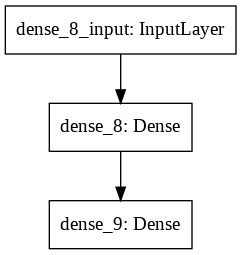

In [72]:
from tensorflow.keras.utils import plot_model
plot_model(model) 

#### Model Training

In [109]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 200, batch_size = 10, verbose = 1)

Epoch 1/200
70/70 [==============================] - 0s 3ms/step - loss: 0.3876 - accuracy: 0.8329 - val_loss: 0.1126 - val_accuracy: 0.9773
Epoch 2/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0593 - accuracy: 0.9886 - val_loss: 0.0357 - val_accuracy: 0.9886
Epoch 3/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0230 - accuracy: 0.9986 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 4/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 5/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 6/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 7/200
70/70 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 8/200
7

### Hyperparameter tunning using GridSearCV

In [96]:
# ----------------------------- Functional Tuning: using Sklearn  ------------------------------
# Goal: To tune the batch size and epochs

# Import KerasRegressor class
#from keras.wrappers.scikit_learn import KerasRegressor

#Import GridSearchCV
#from sklearn.model_selection import GridSearchCV

# Define the model trhough a user-defined function
#def create_model(optimizer=RMSprop(0.01)):
  #model = Sequential()
  #model.add(Dense(6, activation='relu', input_shape=(X_train.shape[1],)))
  #model.add(Dense(1, activation = 'sigmoid'))
  #model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)    # compile the model
  #return model
#model = KerasRegressor(build_fn=create_model, verbose=1)

# Define the hyperparameters grid to be validated
#batch_size = [10, 20, 30, 40, 60, 80, 100, 200]
#epochs = [10, 20, 30, 40, 50, 100]
#param_grid = dict(batch_size=batch_size, nb_epoch=epochs)
#model = KerasRegressor(build_fn=create_model, verbose=1)
#grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Run the GridSearchCV process
#grid_result = grid.fit(X_train, y_train, verbose = 1)

# Print the results of the best model
#print('Best params: ' + str(grid_result.best_params_))

88/88 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.8208
Best params: {'batch_size': 10, 'nb_epoch': 40}


In [101]:
#history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 40, batch_size = 10, verbose = 1)

#### Model evaluation

In [110]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 5.0464e-07 - accuracy: 1.0000


[5.046439923717116e-07, 1.0]

##### Model Accuracy

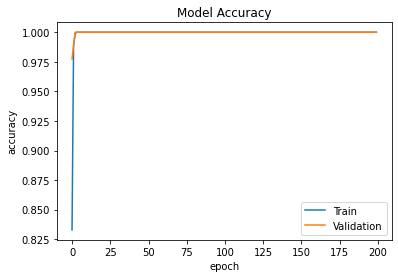

In [111]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["Train", "Validation"])
plt.show()


##### Model Loss

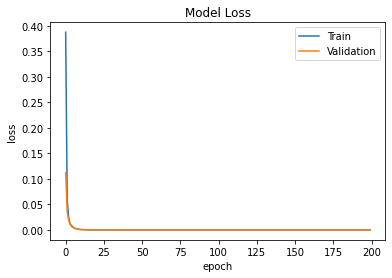

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

# Loading the Test Data



In [ ]:
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/bank_note_data/testing_set_label.csv")

In [ ]:
test_data.shape

(275, 4)

# Predictions

In [ ]:
predictions = model.predict(test_data) # model.predict_classes(test_data)
                                       # model.predict(x) > 0.5).astype("int32")
                                       # np.argmax(model.predict(x), axis=-1), if the model does multi-class classification (e.g. if it uses a `softmax` last-layer activation)
                                       # (model.predict(x) > 0.5).astype("int32"), if the model does binary classification (e.g. if it uses a `sigmoid` last-layer activation)

In [ ]:
np.round(predictions) 

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

## Downloading the Data

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of the model on input features of the new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# References
 1. Learning modules from DPhi Deep Learning Bootcamp
 2. Binary Classification Notebook from the Bootcamp